## Plot the generated daily soil and runoff cation concentrations

In [4]:
import os
import xarray as xr
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from shared_read_HBR import *
from matplotlib import rcParams

rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 14

#site = 'UC_Davis'
#site = 'HBR'

#folder = 'ERW_20240310_HBR_1_ICB20TRCNPRDCTCBC'
#folder = 'ERW_HBR_ICB20TRCNPRDCTCBC'
#folder = 'ERW_HBR_ICB1850CNRDCTCBC_ad_spinup'
#folder = 'ERW_20231110_UC_Davis_ICB20TRCNPRDCTCBC'
#folder = 'ERW_UC_Davis_ICB20TRCNPRDCTCBC'
#folder = 'ERW_UC_Davis_ICB1850CNRDCTCBC_ad_spinup'

date_prefix = '20241125'
site = 'UIEF'
suffix = '3year_rmethod1_ens5erw'

folder = f'{date_prefix}_{site}_ICB20TRCNPRDCTCBC_{suffix}'

## 1. Background weathering rates

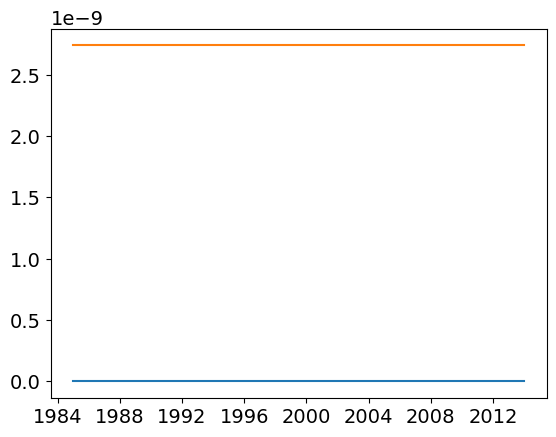

In [ ]:
plt.plot(tvec, hr['background_flux'][:, 0,0])
plt.plot(tvec, hr['background_cec'][:, 0,0])

## 2. Primary mineral content and dissolution

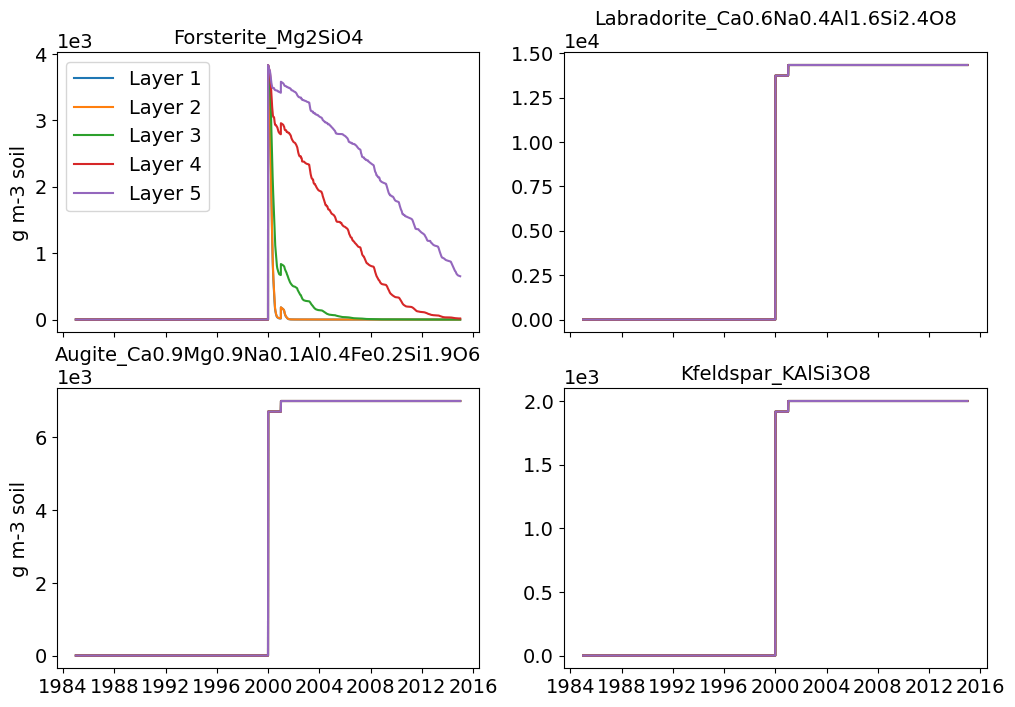

In [ ]:
filter = tvec.year >= 1851 # 1990

minerals_name = ['Wollastonite_CaSiO3', 'Forsterite_Mg2SiO4', 'Albite_NaAlSi3O8', 
                 'Anorthite_CaAl2Si2O8', 'Epidote_Ca2FeAl2(SiO4)3(OH)', 'Calcite_CaCO3',
                 'Labradorite_Ca0.6Na0.4Al1.6Si2.4O8', 'Augite_Ca0.9Mg0.9Na0.1Al0.4Fe0.2Si1.9O6',
                 'Kfeldspar_KAlSi3O8', 'Enstatite_MgSiO3']
minid_list = [2, 7, 8, 9]

fig, axes = plt.subplots(2, 2, figsize = (12, 8), sharex = True)
for i, minid in enumerate(minid_list):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec[filter], hr[f'primary_mineral_vr_{minid}'][filter, layer, 0],
                label = f'Layer {layer+1}')
    ax.yaxis.set_major_formatter(plt.ScalarFormatter())
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    if i == 0:
        ax.legend()
    ax.set_title(minerals_name[minid-1])
    if np.mod(i, 2) == 0:
        ax.set_ylabel('g m-3 soil')

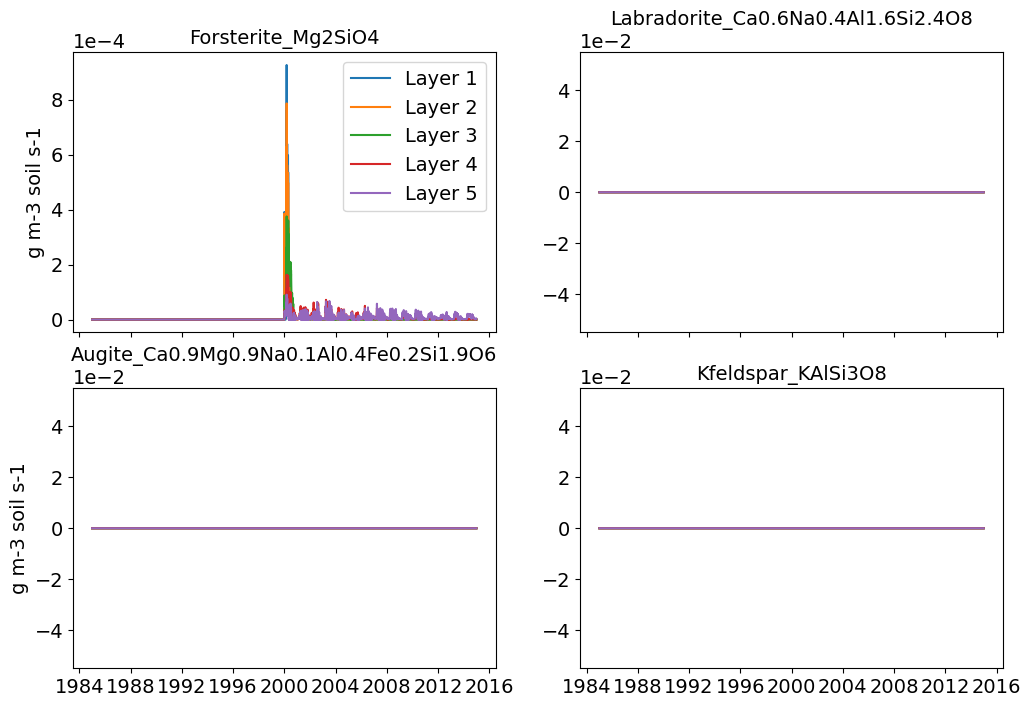

In [ ]:
filter = tvec.year >= 1850 # 1990

# rate of dissolution
fig, axes = plt.subplots(2, 2, figsize = (12, 8), sharex = True)
for i, minid in enumerate(minid_list):
    ax = axes.flat[i]
    for layer in range(5):
        ax.plot(tvec[filter], hr[f'primary_dissolve_vr_{minid}'][filter, layer, 0],
                label = f'Layer {layer+1}')
    ax.yaxis.set_major_formatter(plt.ScalarFormatter())
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    if i == 0:
        ax.legend()
    ax.set_title(minerals_name[minid-1])
    if np.mod(i, 2) == 0:
        ax.set_ylabel('g m-3 soil s-1')

/tmp/ipykernel_1485392/3724586890.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/tmp/ipykernel_1485392/3724586890.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/tmp/ipykernel_1485392/3724586890.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/tmp/ipykernel_1485392/3724586890.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(4931.2, 16982.8, 0.0, 1.0)

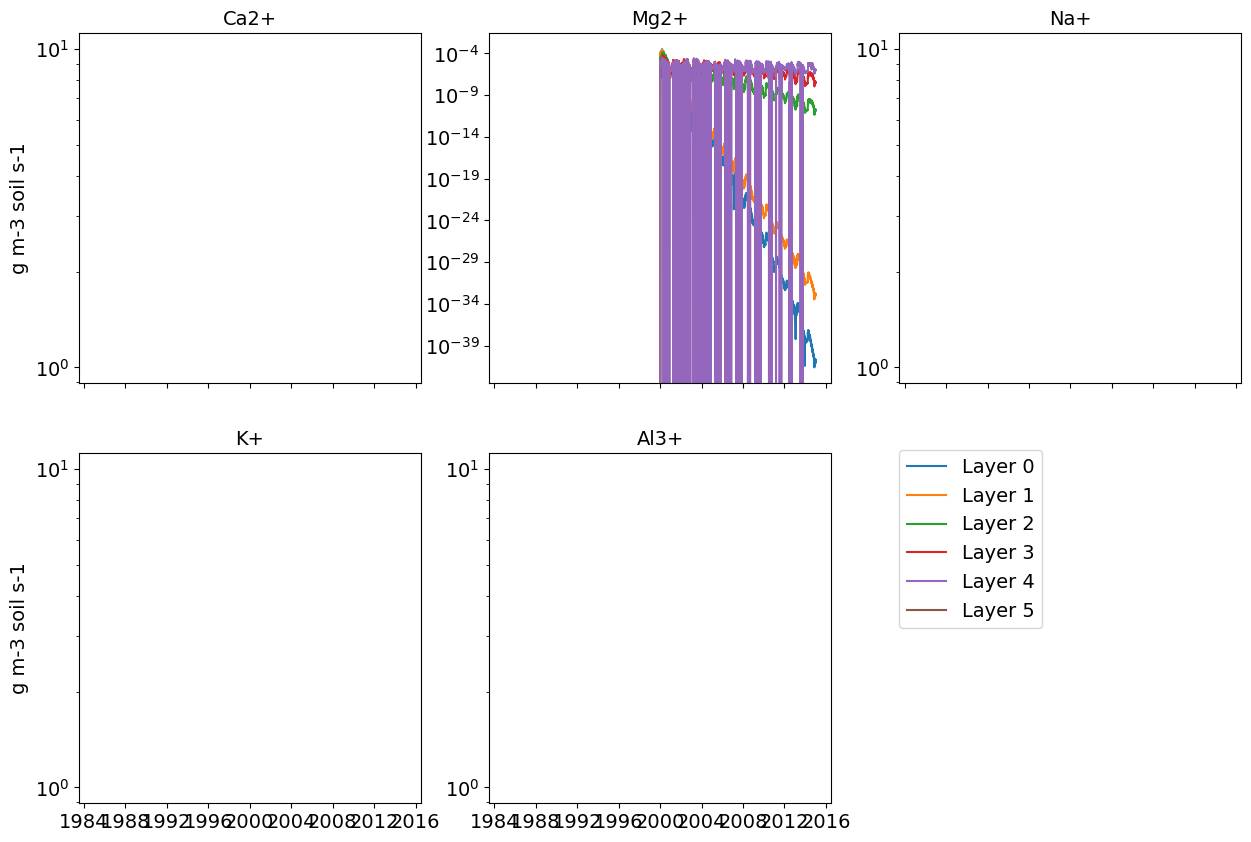

In [ ]:
filter = tvec.year >= 1850 #1990

# rate of cation flux
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, min in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec[filter], hr[f'primary_cation_flux_vr_{i+1}'][filter, layer, 0], 
                label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 3. Rate of secondary mineral formation

/tmp/ipykernel_1485392/365589388.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


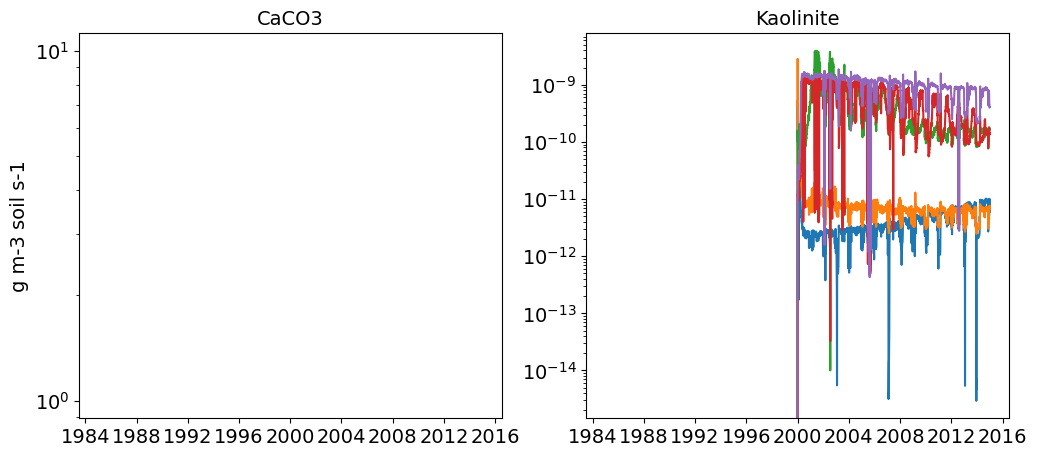

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5), sharex = True)
for i, minsec in enumerate(['CaCO3', 'Kaolinite']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'r_precip_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(minsec)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')

/tmp/ipykernel_1485392/105017906.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


(4931.2, 16982.8, 0.0, 1.0)

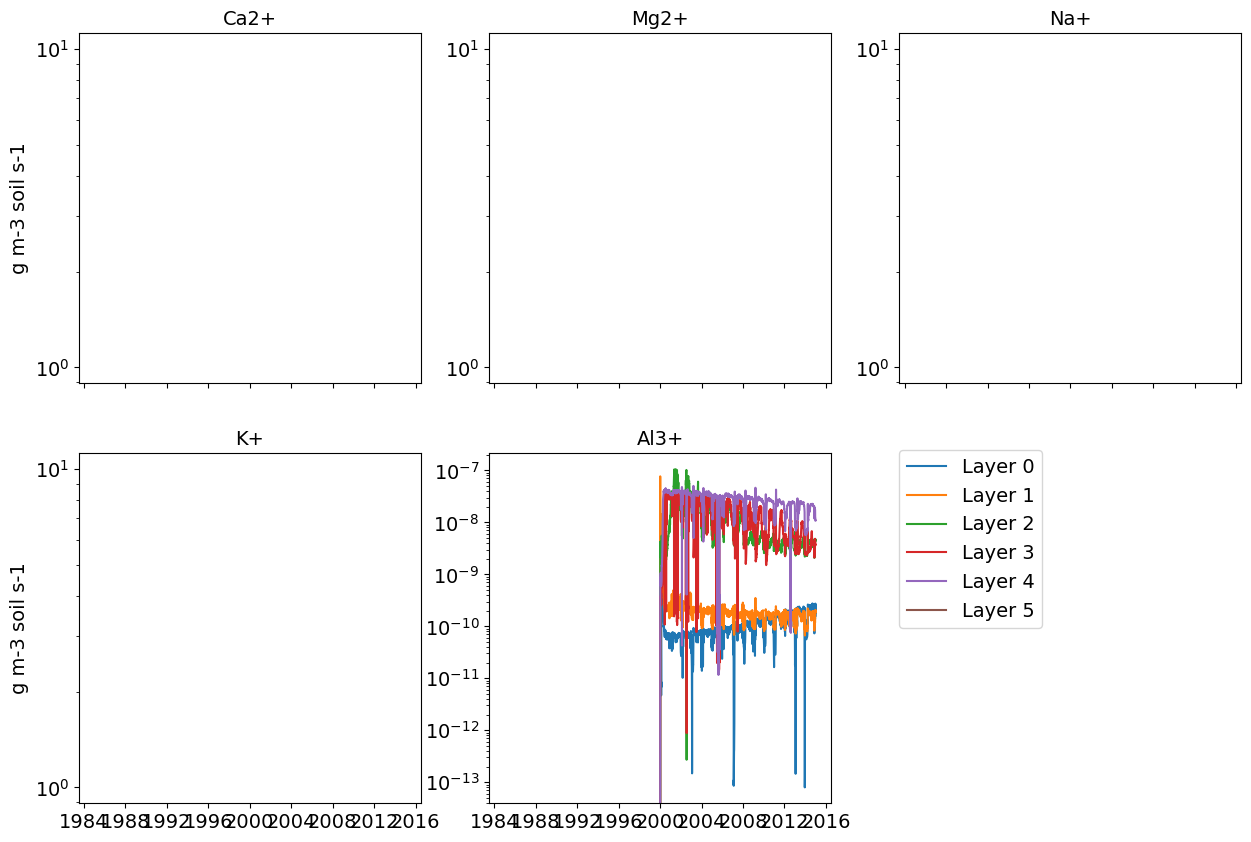

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, min in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'secondary_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(min)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

## 4. Cation exchange

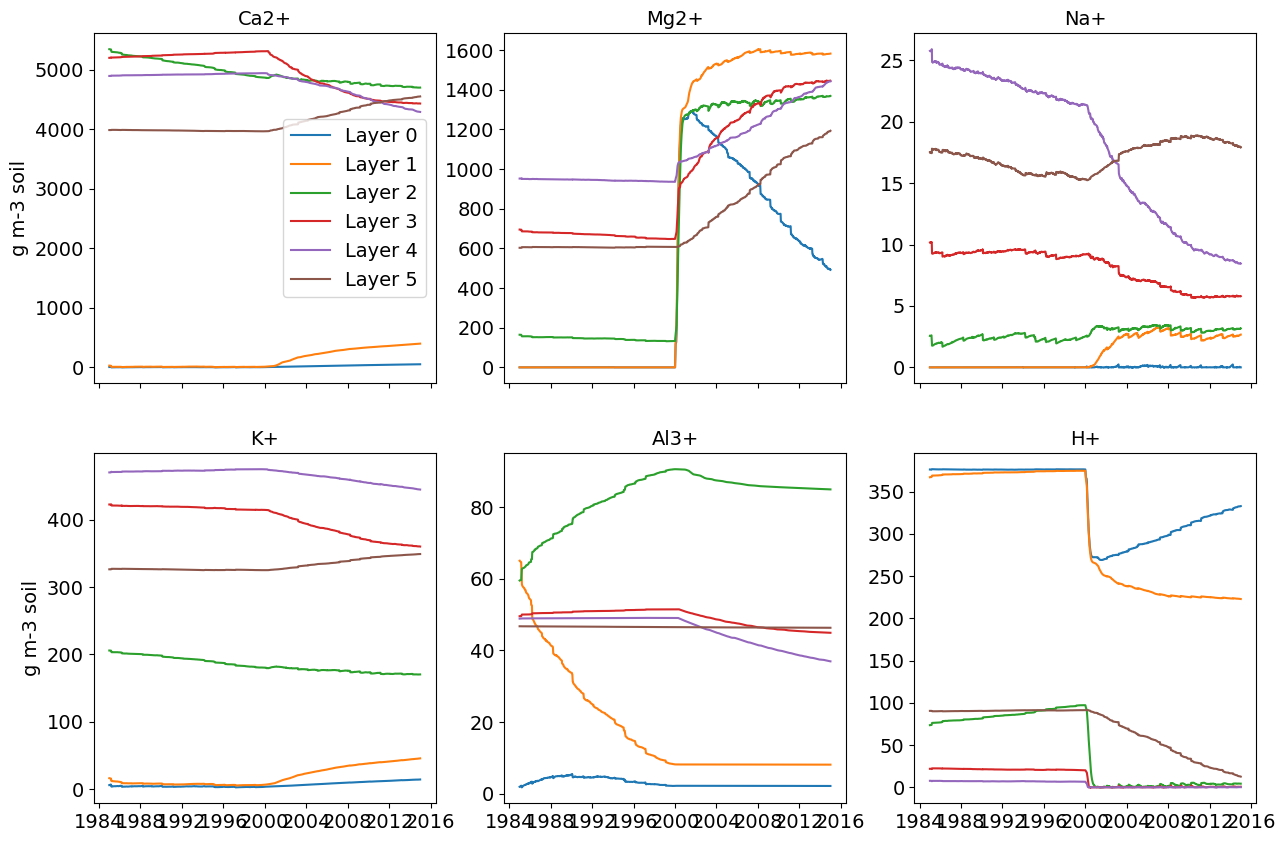

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cec_cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(6):
    ax.plot(tvec, hr[f'cec_proton_vr'][:, layer, 0], label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('cec_cation_vr.png', dpi = 600)

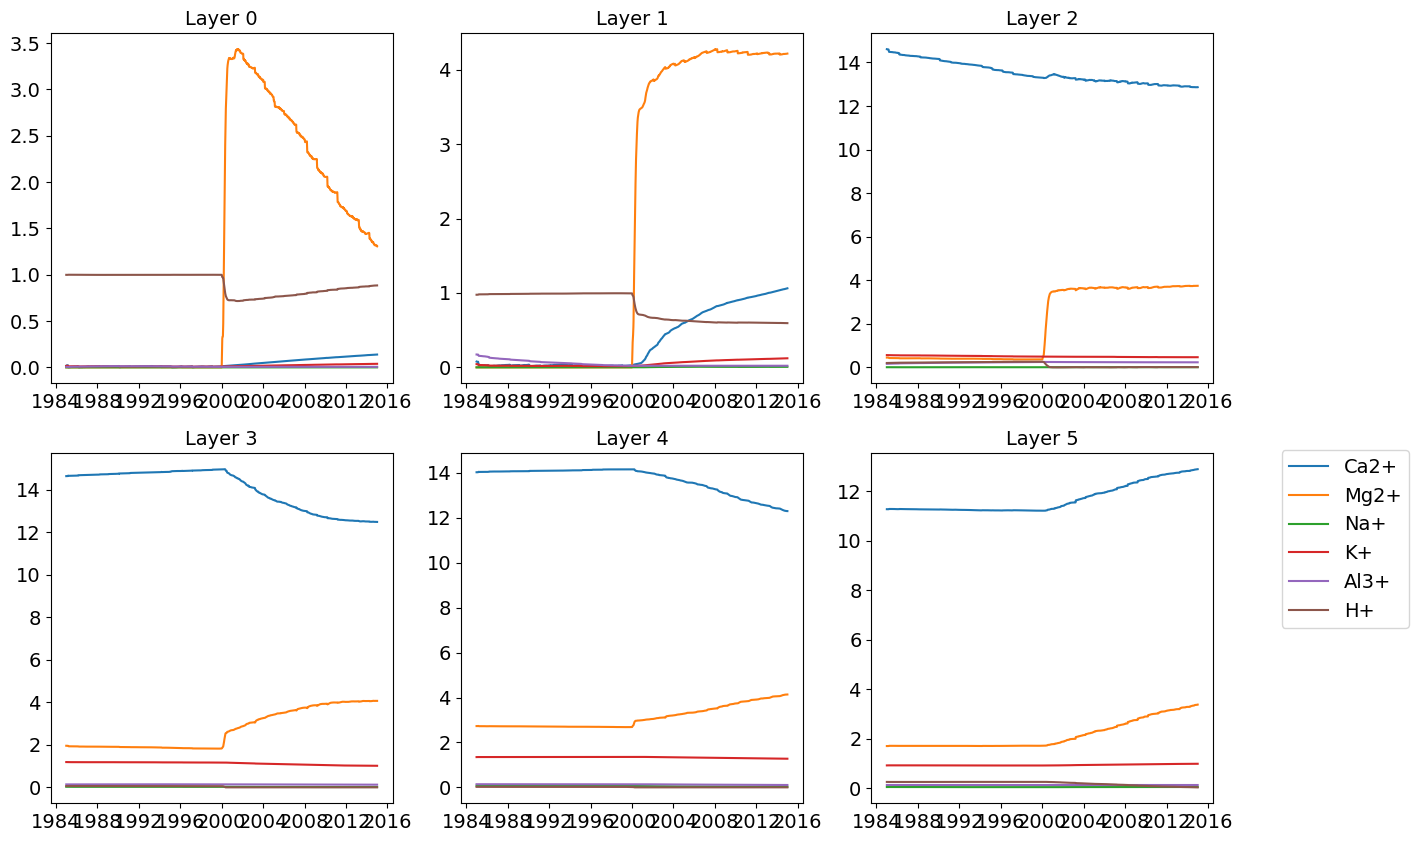

In [ ]:
# convert from gram to percentage meq
valence_cation = [2,2,1,1,3]
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]

fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for layer in range(6):
    ax = axes.flat[layer]

    tot = hr[f'cec_proton_vr'][:, layer, 0]
    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        tot = tot + hr[f'cec_cation_vr_{i+1}'][:, layer, 0] / mass_cation[i] * valence_cation[i]

    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        ax.plot(tvec, hr[f'cec_cation_vr_{i+1}'][:, layer, 0]/tot, label = cation)
    ax.plot(tvec, hr[f'cec_proton_vr'][:, layer, 0]/tot, label = 'H+')

    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax.legend(loc = (1.2,0.5))
fig.savefig('cec_cation_vr_beta.png', dpi = 600)

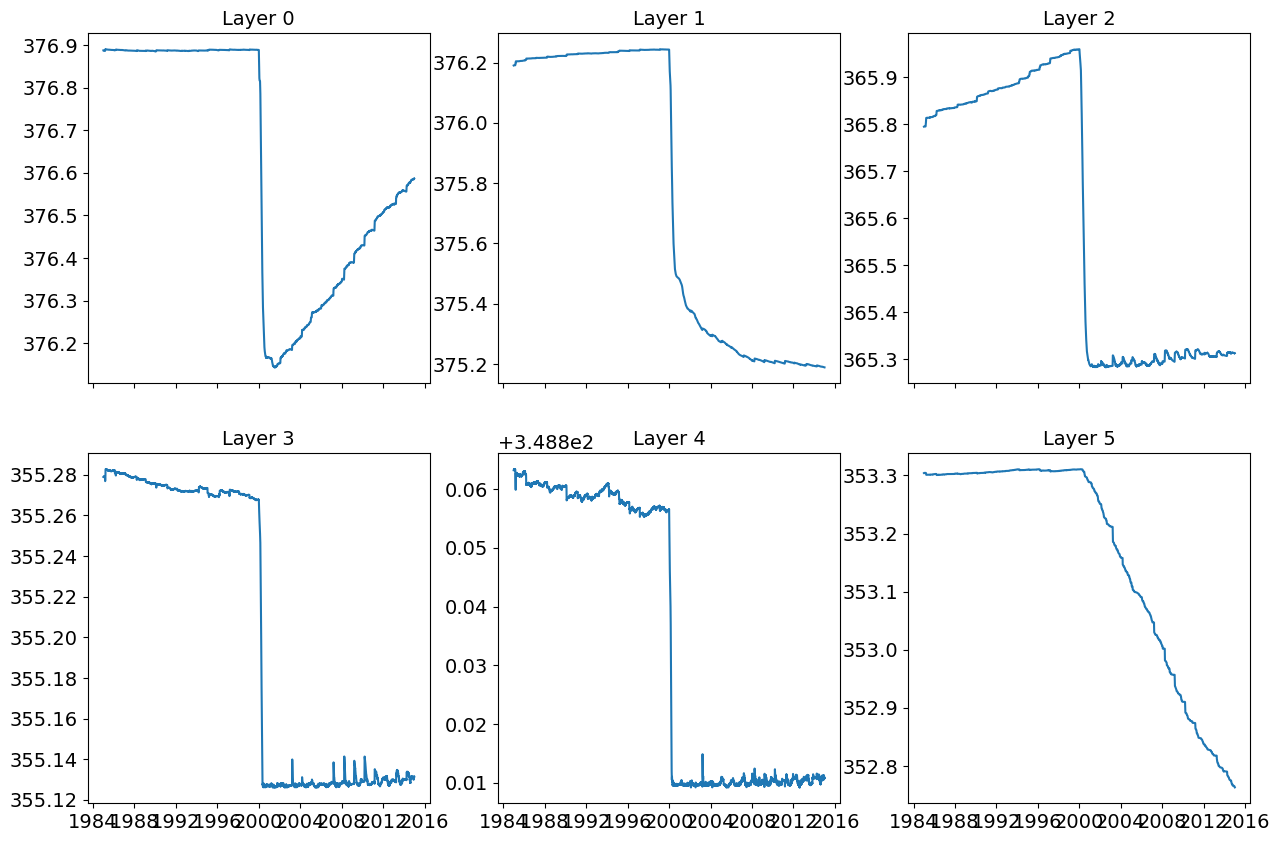

In [ ]:
# check the charge balance
valence_cation = [2,2,1,1,3]
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)

for layer in range(6):
    ax = axes.flat[layer]

    tot = hr[f'cec_proton_vr'][:, layer, 0].values
    for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
        tot = tot + hr[f'cec_cation_vr_{i+1}'][:, layer, 0].values / mass_cation[i] * valence_cation[i]

    ax.plot(tvec, tot)

    ax.set_title(f'Layer {layer}')

    if np.mod(i, 3) == 0:
        ax.set_ylabel('mol m-3 soil')
fig.savefig('cec_cation_vr_charge.png', dpi = 600)

KeyError: 'cec_proton_flux_vr'

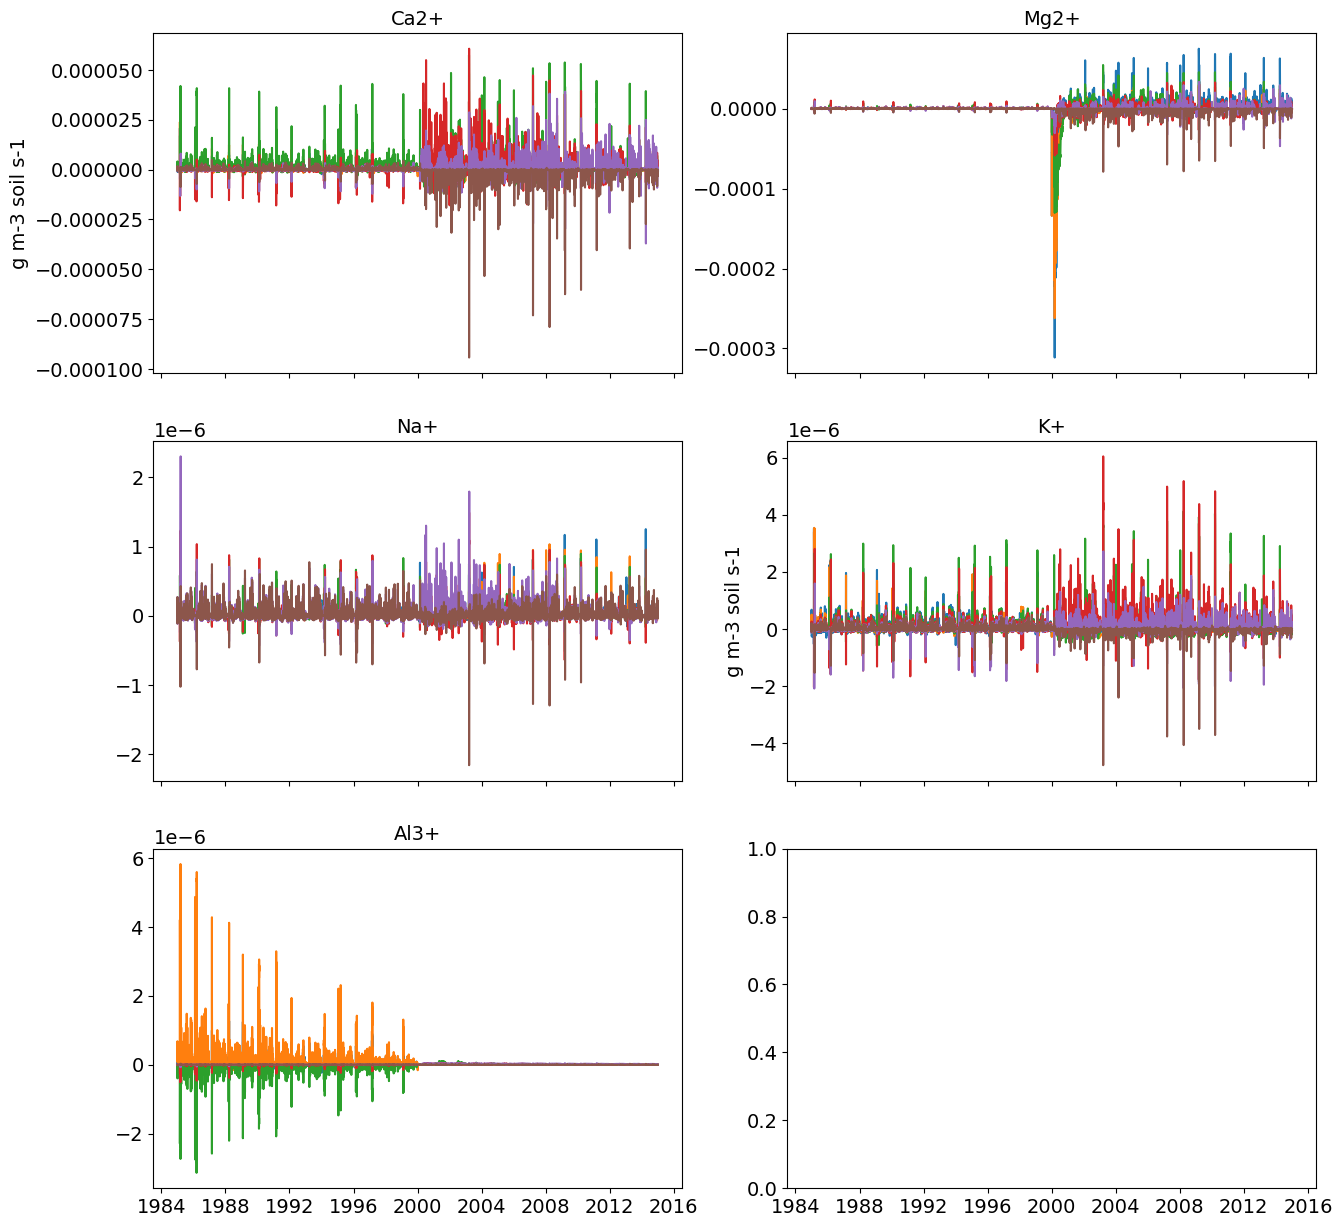

In [ ]:
# positive CEC flux is into solution, negative out of solution
fig, axes = plt.subplots(3, 2, figsize = (15, 15), sharex = True)
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cec_cation_flux_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
#ax = axes.flat[-1]
#for layer in range(6):
#    ax.plot(tvec, hr[f'cec_proton_flux_vr'][:, layer, 0], label = f'Layer {layer}')
#ax.set_title('H+')
ax.legend()
fig.savefig('cec_cation_flux_vr.png', dpi = 600)

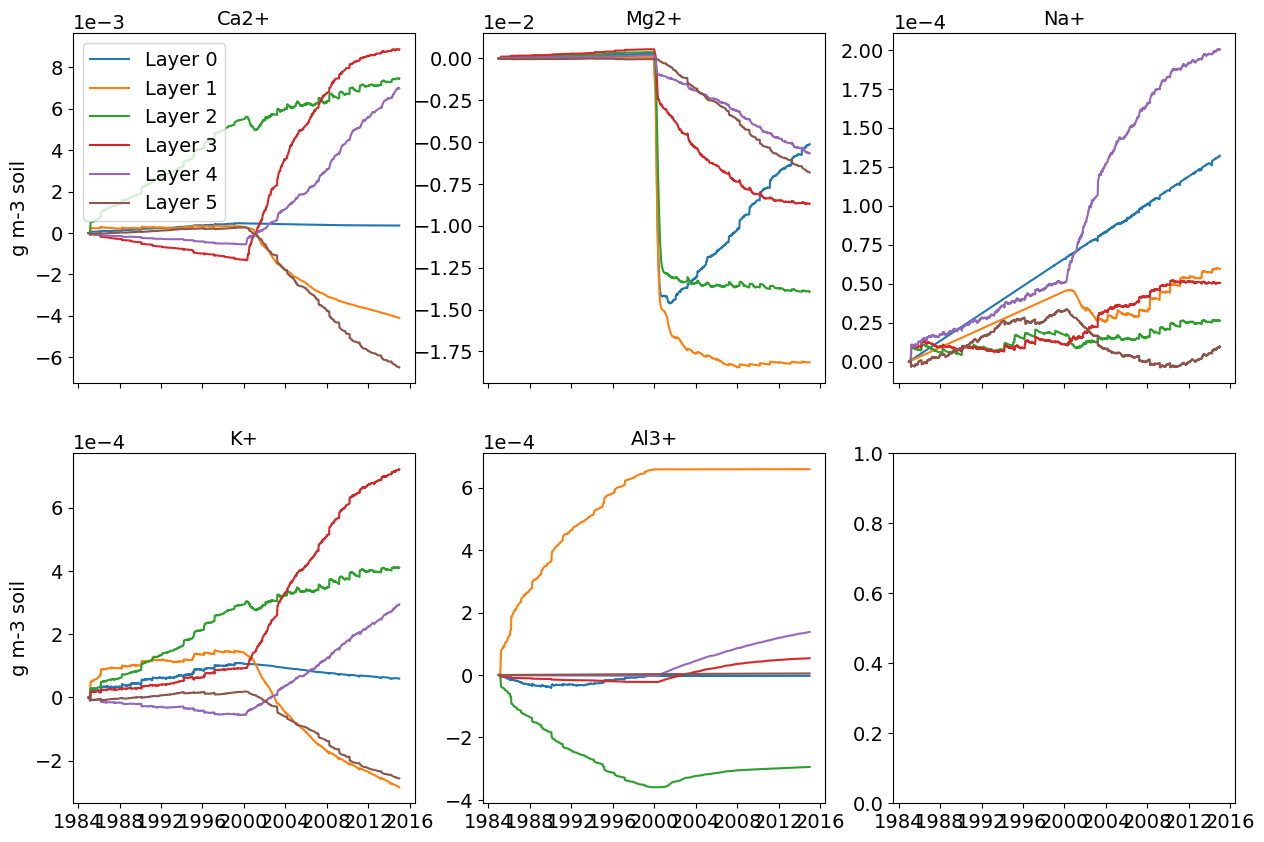

In [ ]:
# CEC cation flux, cumulative
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        s = pd.Series(hr[f'cec_cation_flux_vr_{i+1}'][:, layer, 0].values,
                      index = tvec)
        s = s.cumsum()
        ax.plot(tvec, s, label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#ax = axes.flat[-1]
#for layer in range(6):
#    s = pd.Series(hr['cec_proton_flux_vr'][:, layer, 0].values, index = tvec)
#    s = s.cumsum()
#    ax.plot(tvec, s, label = f'Layer {layer}')
#ax.set_title('H+')
fig.savefig('cec_cation_flux_vr_rolling.png', dpi = 600)

## 5. Cation in/out by infiltration, runoff and leaching

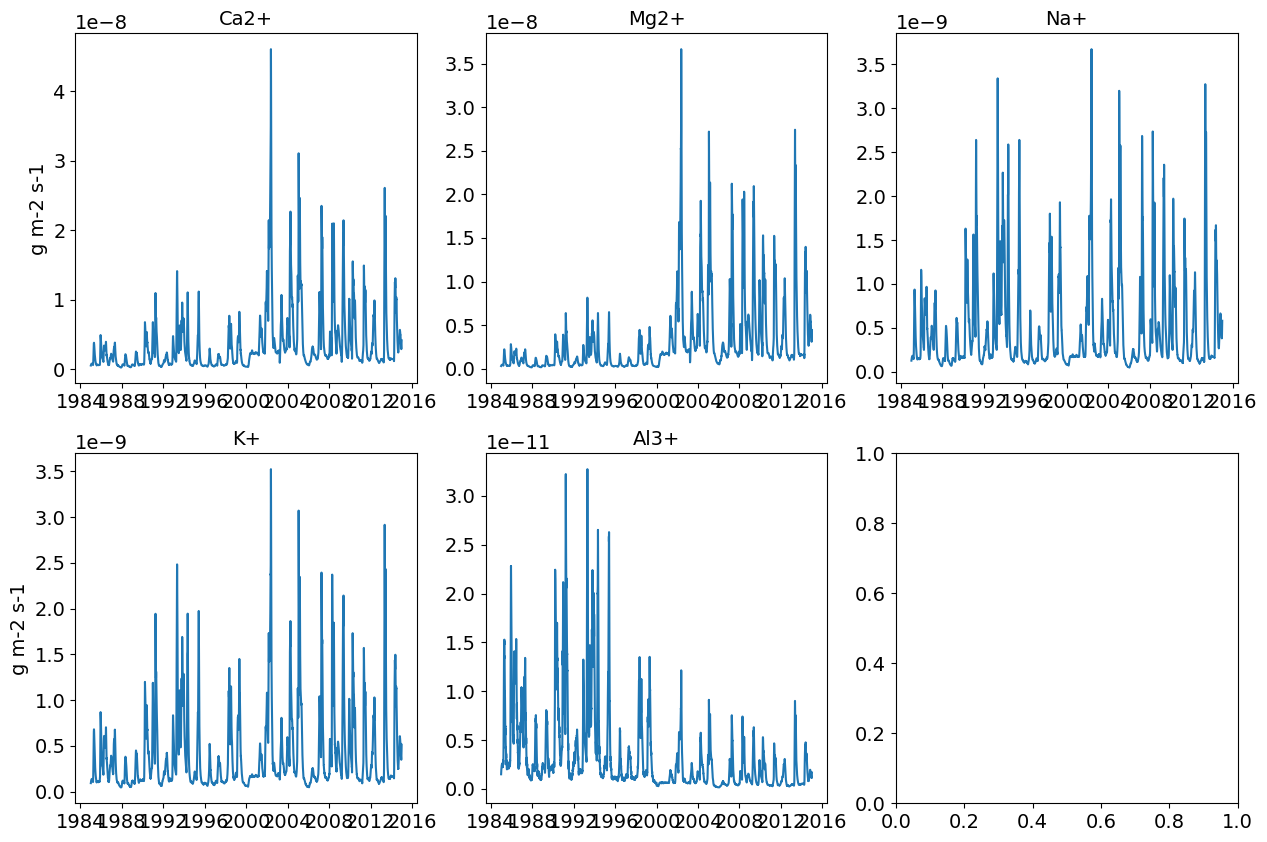

In [ ]:
# Need to have a vertical drainage term
cation_export_sim = pd.DataFrame(
    hr['cation_leached'][:, :, 0],
    index = tvec, columns = ['Ca2+','Mg2+','Na+','K+','Al3+'])

fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    ax.plot(tvec, cation_export_sim[cation])
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-2 s-1')
    ax.set_title(cation)
    #ax.set_yscale('log')

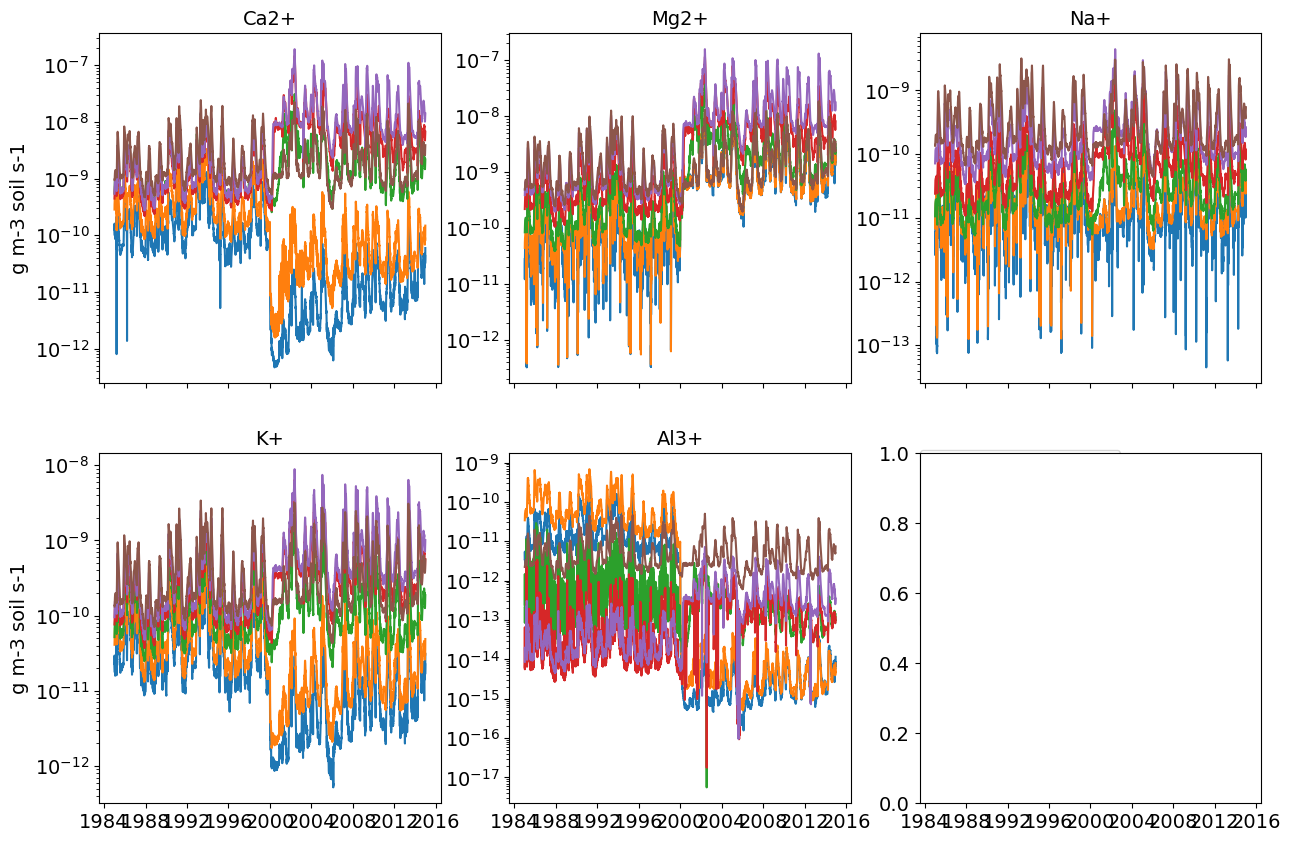

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10), sharex = True)
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_leached_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
    ax.set_yscale('log')
ax.legend(loc = (1.2, 0.5))
axes.flat[-1].axis('off')

(0.0, 1.0, 0.0, 1.0)

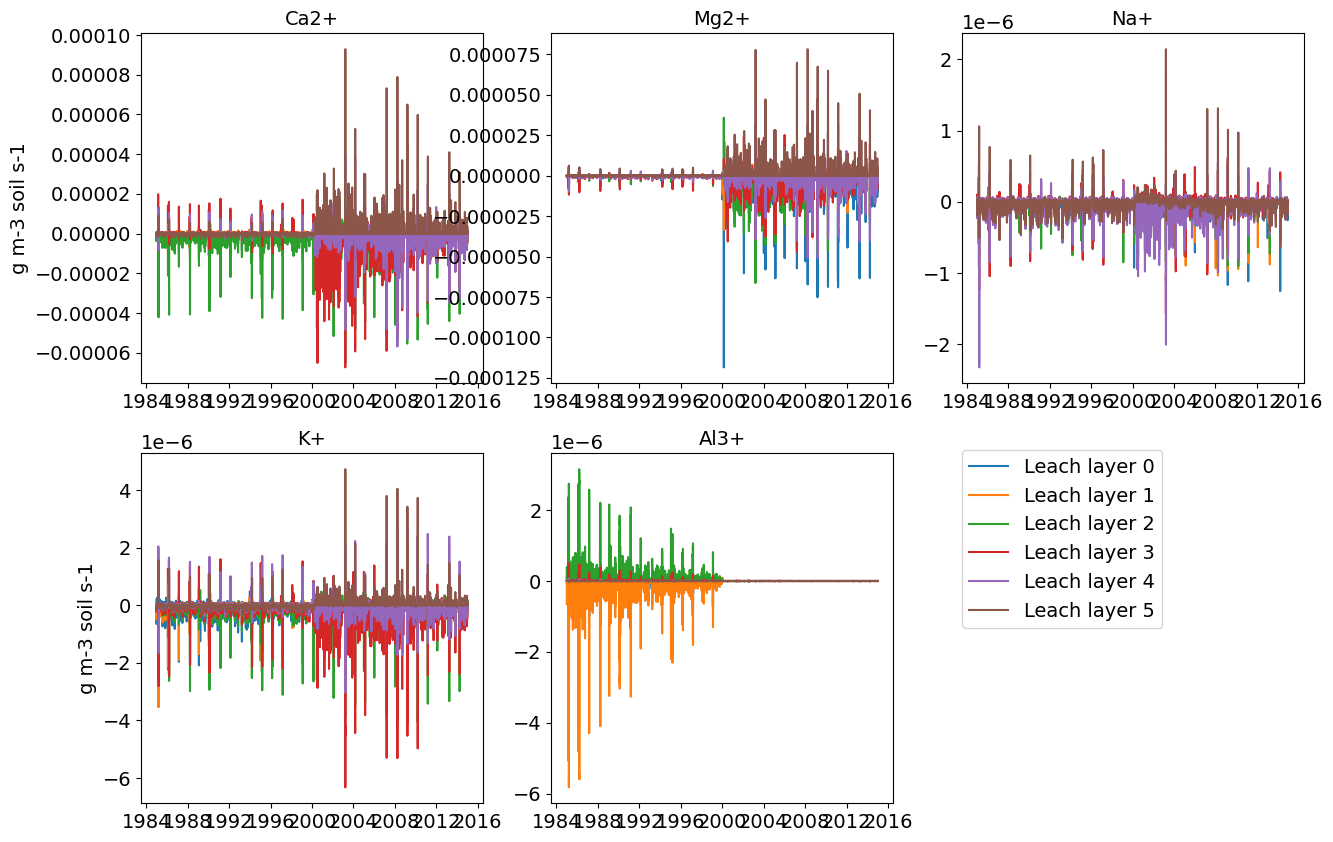

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_infl_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax.legend(loc = (1.2, 0.5))
axes.flat[-1].axis('off')

Text(0.5, 1.0, 'H+')

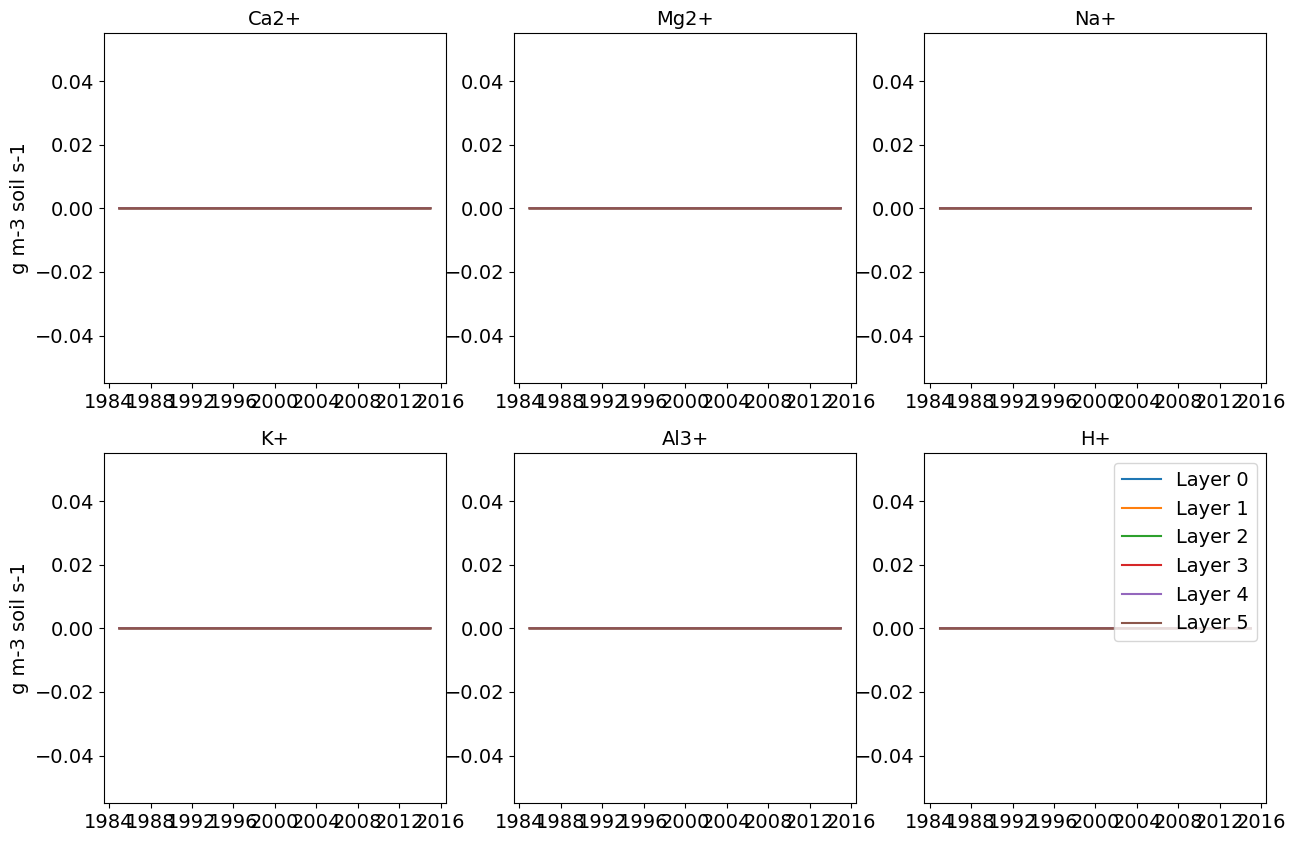

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_oufl_vr_{i+1}'][:, layer, 0], label = f'layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_oufl_vr'][:, layer, 0], label = f'Layer {layer}')
ax.legend()
ax.set_title('H+')

Text(0.5, 1.0, 'H+')

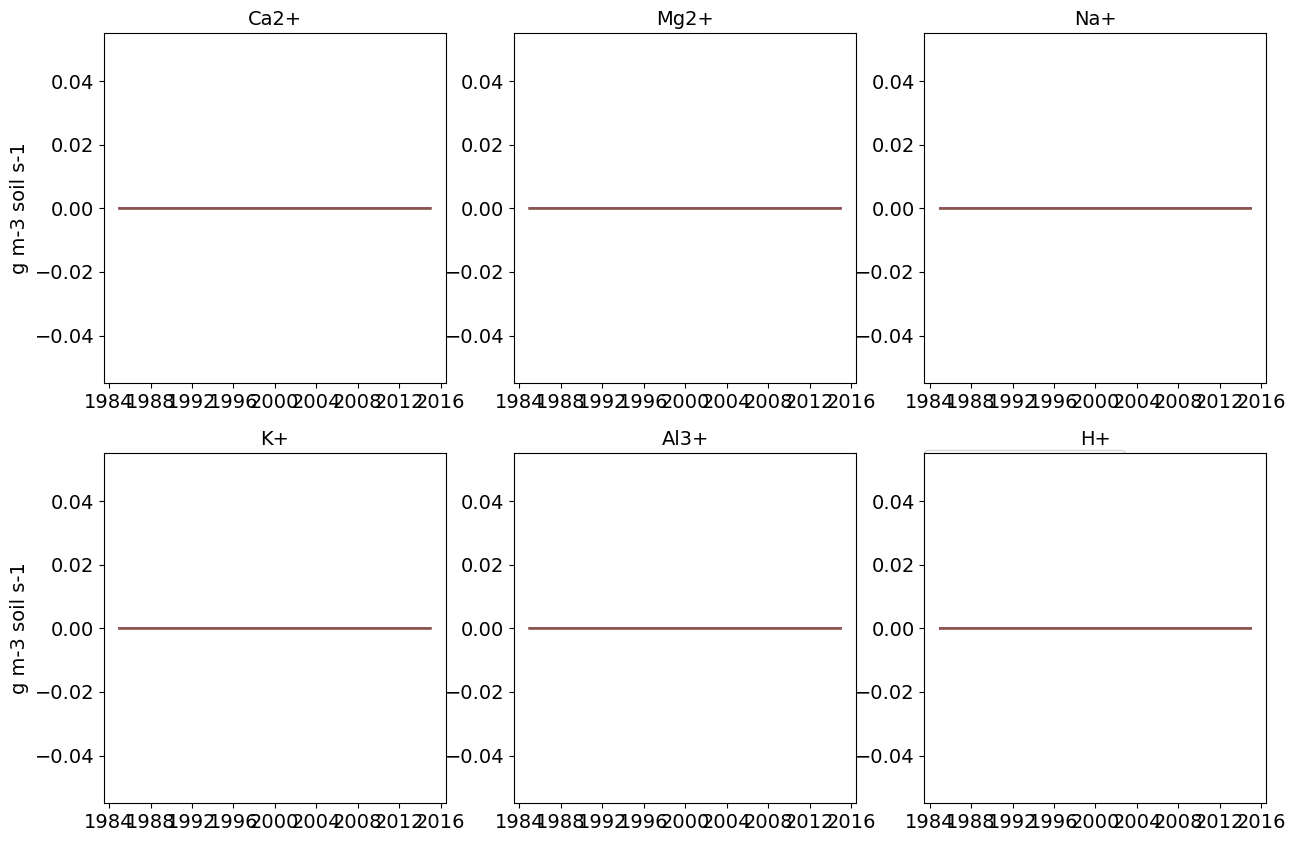

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_uptake_vr_{i+1}'][:, layer, 0], label = f'Leach layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil s-1')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr['proton_uptake_vr'][:, layer, 0])
ax.set_title('H+')

## 6. soil pH and cation concentration in soil pore water

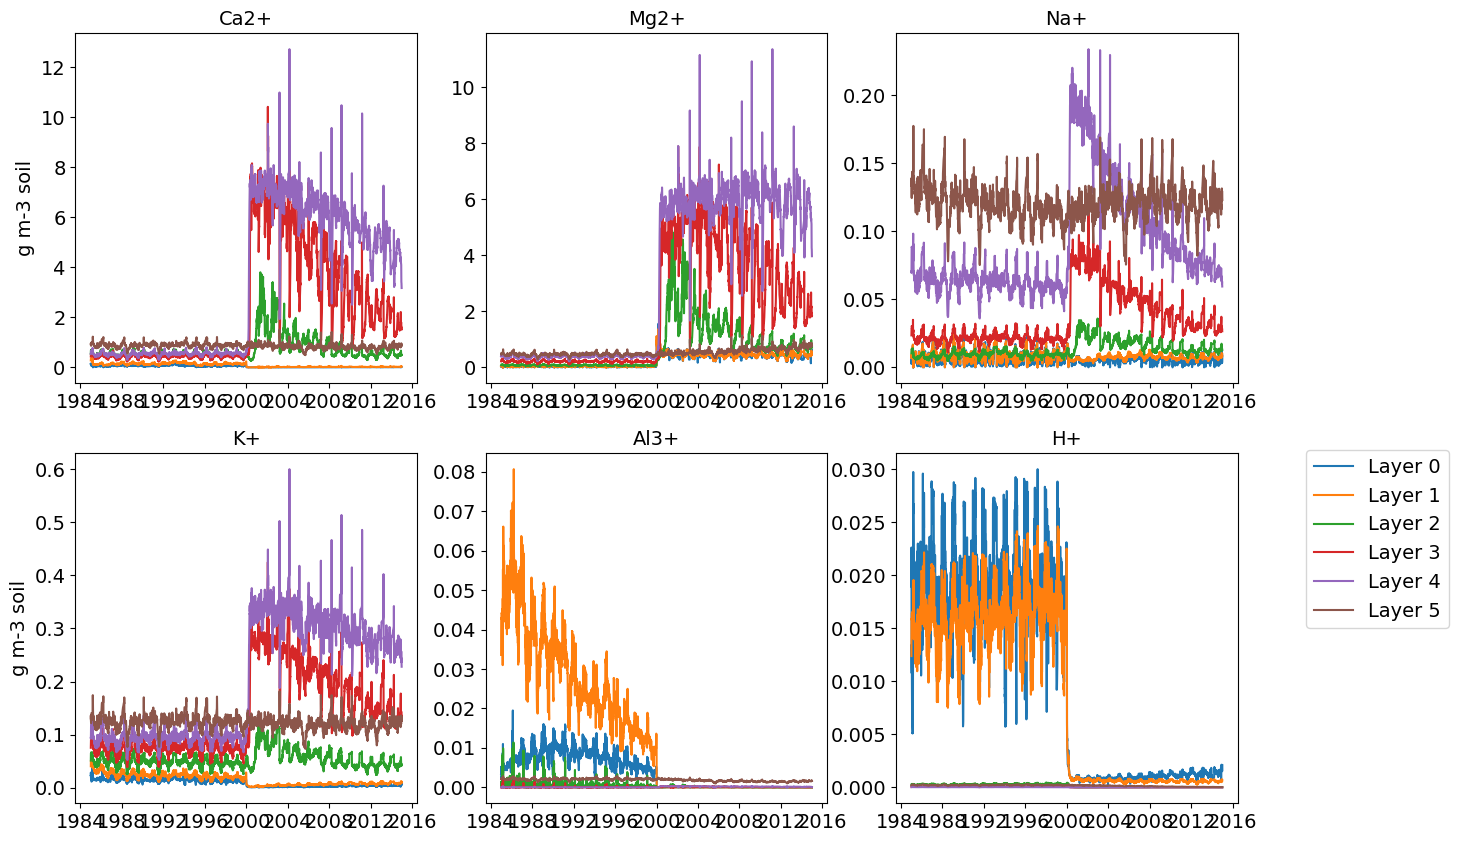

In [ ]:
# In terms of g/m3 soil

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'cation_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec, hr[f'proton_vr'][:, layer, 0], label = f'Layer {layer}')
    # convert from g m-3 soil to mol kg-1 water
    #ax.plot(tvec, hr[f'proton_vr'][:,layer,0]*1e-3/hr['H2OSOI'][:,layer,0], 
    #        label = f'Layer {layer}')
    ax.set_title('H+')
ax.legend(loc = (1.2,0.5))

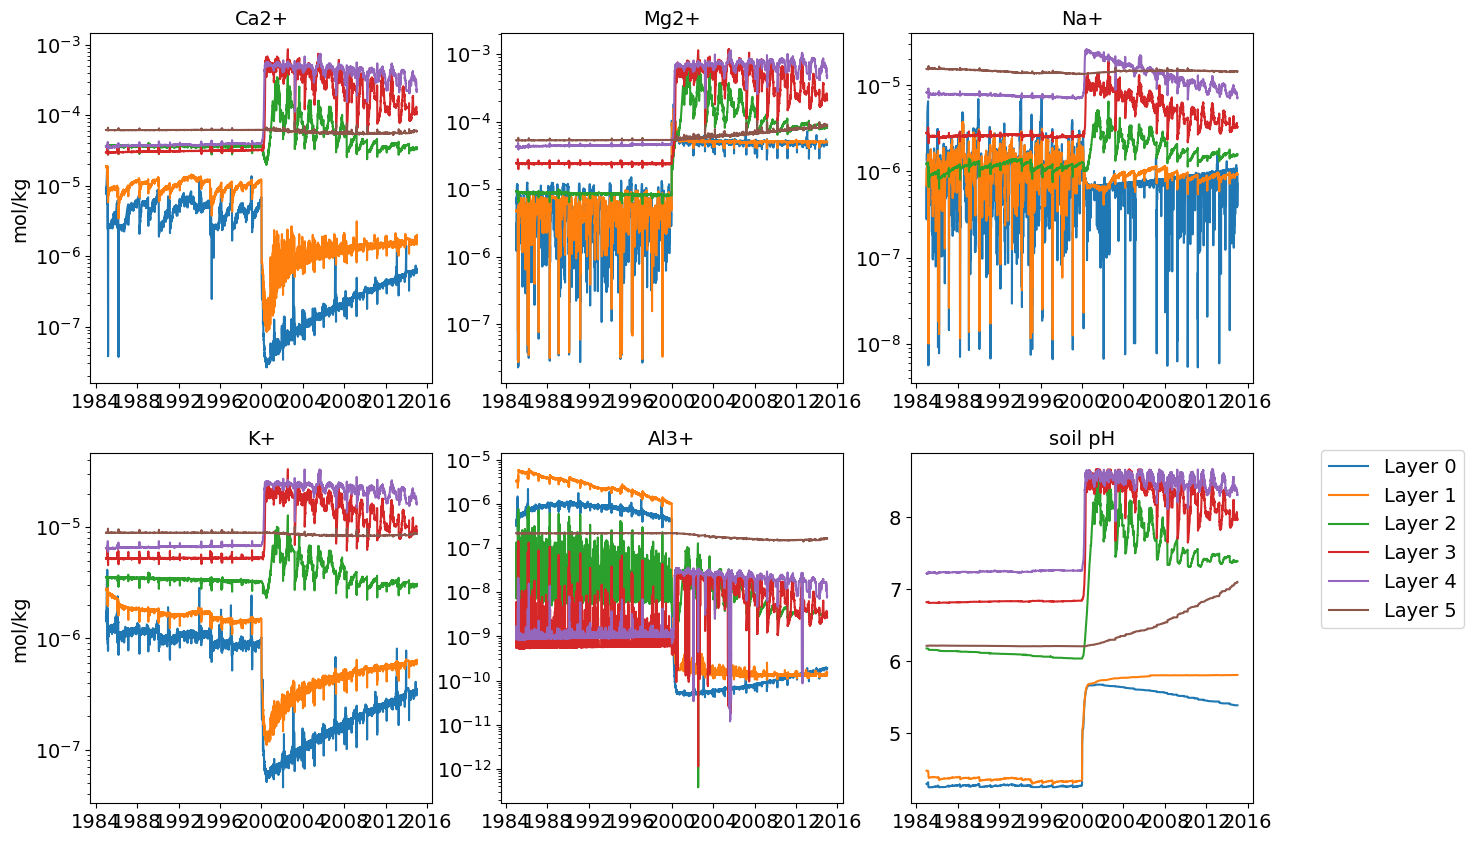

In [ ]:
# in terms of mol/kg
mass_cation = [40.078, 24.305, 22.99, 39.0983, 26.98]

filter = (tvec.year >= 1850) # & (tvec.month >= 10)

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec[filter], hr[f'cation_vr_{i+1}'][filter, layer, 0]*1e-3/mass_cation[i]/ \
                hr['H2OSOI'][:,layer,0], label = f'Layer {layer}')
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('mol/kg')
    ax.set_yscale('log')
ax = axes.flat[5]
for layer in range(6):
    ax.plot(tvec[filter], hr[f'soil_pH'][filter, layer, 0], label = f'Layer {layer}')
ax.set_title('soil pH')
    # convert from g m-3 soil to mol kg-1 water
    #ax.plot(tvec, hr[f'proton_vr'][:,layer,0]*1e-3/hr['H2OSOI'][:,layer,0], 
    #        label = f'Layer {layer}')
ax.legend(loc = (1.2,0.5))

(0.0, 1.0, 0.0, 1.0)

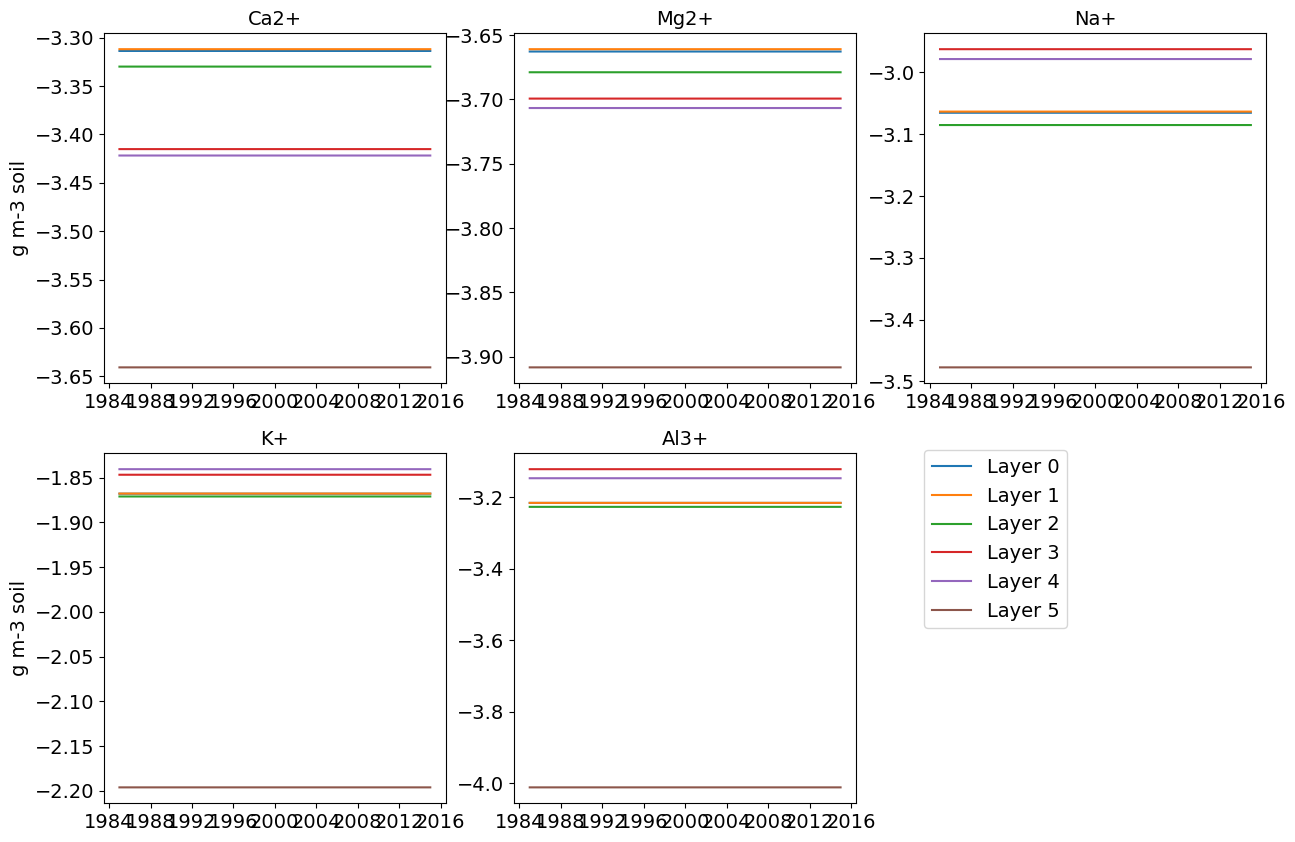

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'log_km_col_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 8. Omega values

(0.0, 1.0, 0.0, 1.0)

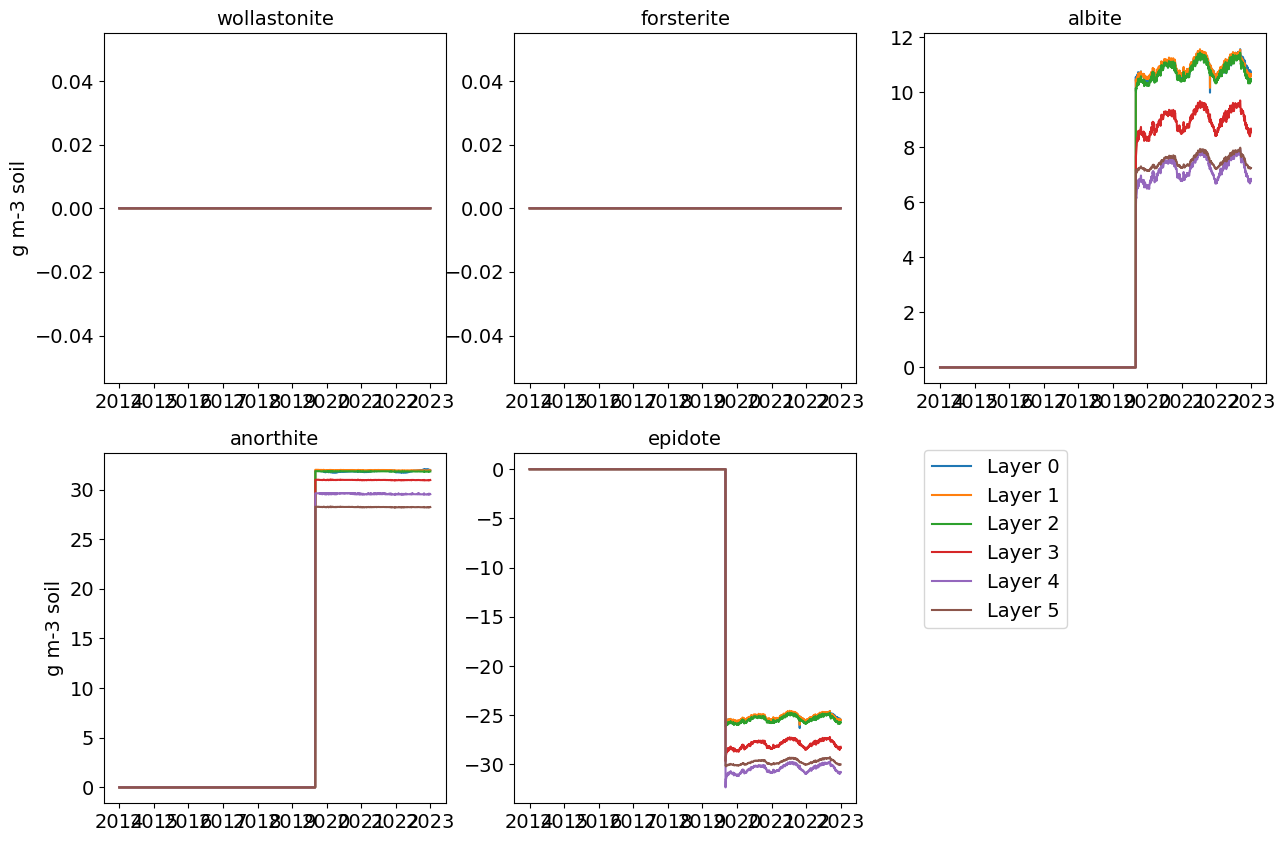

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['wollastonite', 'forsterite', 'albite', 'anorthite', 'epidote']):
    ax = axes.flat[i]
    for layer in range(6):
        ax.plot(tvec, hr[f'log_omega_vr_{i+1}'][:, layer, 0], label = f'Layer {layer}')
    if i == 4:
        ax.legend(loc = (1.2,0.5))
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
axes.flat[-1].axis('off')

## 9. Net cation fluxes in/out of the solution

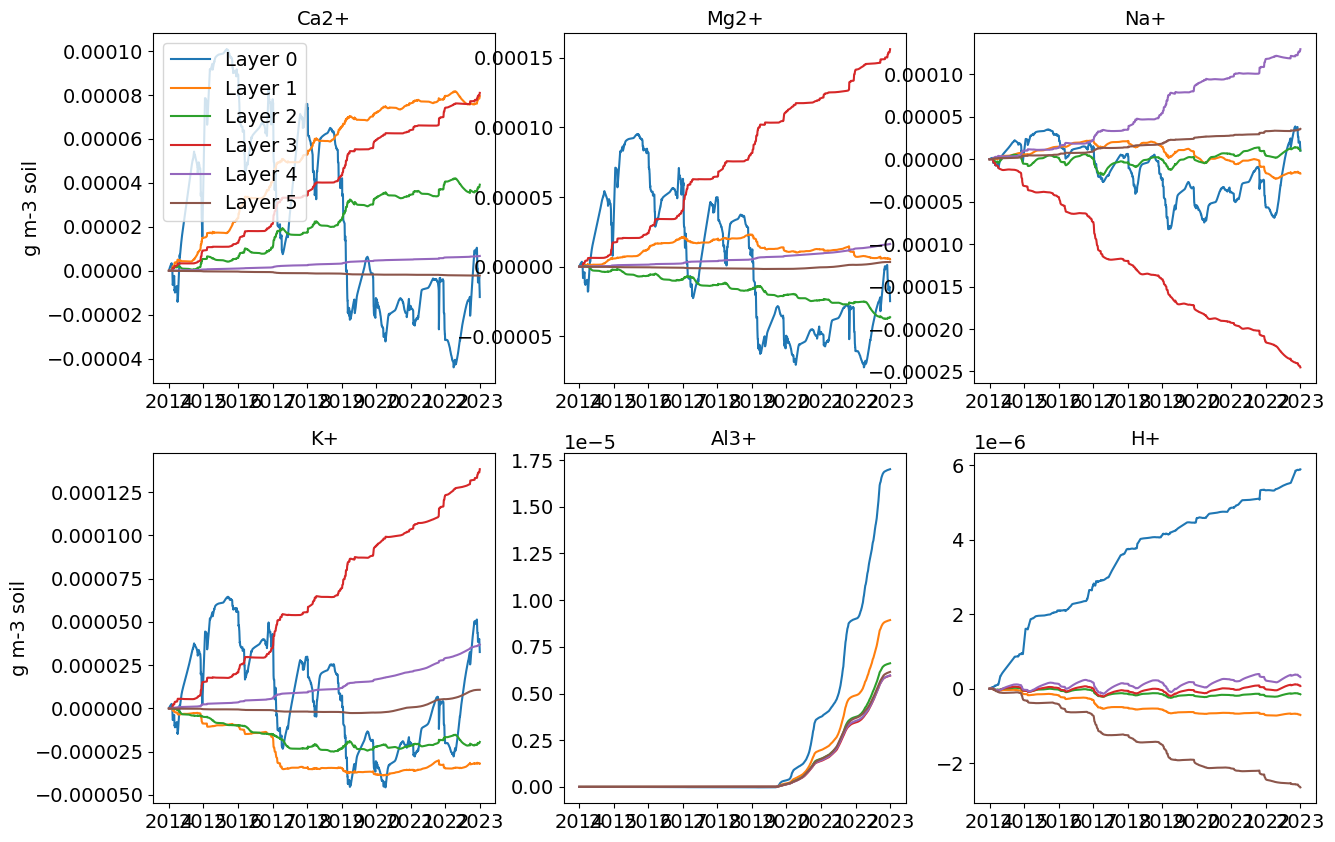

In [ ]:
# Skip the CEC-related flux (redistribution flux)
# Thus gives the total balance of the solution and 
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i, cation in enumerate(['Ca2+', 'Mg2+', 'Na+', 'K+', 'Al3+']):
    ax = axes.flat[i]
    for layer in range(6):
        tot = hr[f'background_weathering_vr_{i+1}'][:,layer,0].values + \
            hr[f'primary_cation_flux_vr_{i+1}'][:,layer,0].values + \
            hr[f'cation_infl_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_oufl_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_uptake_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_leached_vr_{i+1}'][:,layer,0].values - \
            hr[f'cation_runoff_vr_{i+1}'][:,layer,0].values
            # hr[f'cec_cation_flux_vr_{i+1}'][:,layer,0].values + \
        s = pd.Series(tot, index = tvec)
        s = s.cumsum()
        ax.plot(tvec, s, label = f'Layer {layer}')
    if i == 0:
        ax.legend()
    ax.set_title(cation)
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')
ax = axes.flat[-1]
for layer in range(6):
    tot = - hr['primary_proton_flux_vr'][:,layer,0].values + \
        hr['proton_infl_vr'][:,layer,0].values - \
        hr['proton_oufl_vr'][:,layer,0].values - \
        hr['proton_uptake_vr'][:,layer,0].values - \
        hr['proton_leached_vr'][:,layer,0].values - \
        hr['proton_runoff_vr'][:,layer,0].values
        # hr['cec_proton_flux_vr'][:,layer,0].values + \
    s = pd.Series(tot, index = tvec)
    s = s.cumsum()
    ax.plot(tvec, s, label = f'Layer {layer}')
ax.set_title('H+')
fig.savefig('total_cation_flux_vr_rolling.png', dpi = 600)

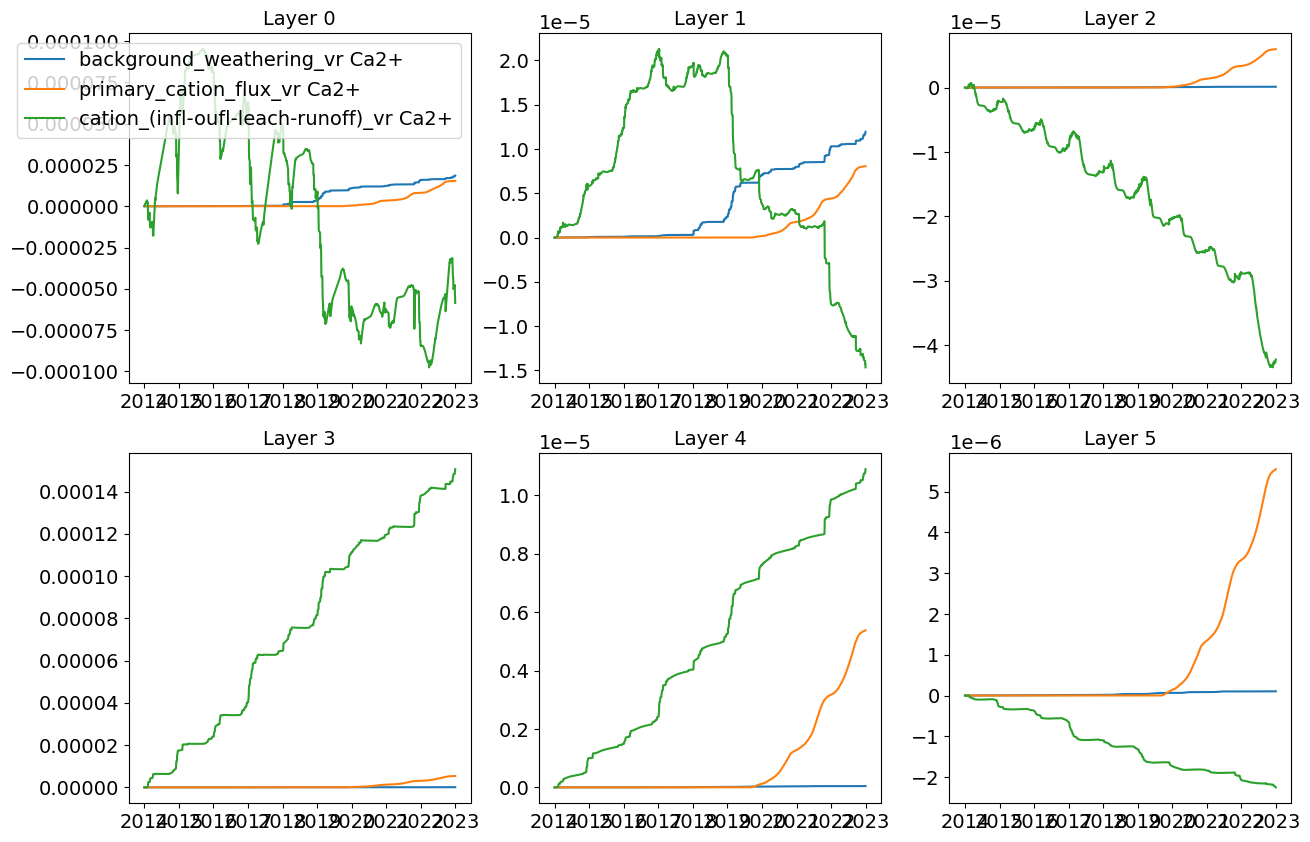

In [ ]:
# individual terms in the cation balance
i = 1 
cation = 'Ca2+'

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for layer in range(6):
    ax = axes.flat[layer]
    s = pd.Series(hr[f'background_weathering_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'background_weathering_vr {cation}')

    s = pd.Series(hr[f'primary_cation_flux_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'primary_cation_flux_vr {cation}')

    s = pd.Series(hr[f'cation_infl_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_oufl_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_leached_vr_{i+1}'][:,layer,0].values - 
                  hr[f'cation_runoff_vr_{i+1}'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = f'cation_(infl-oufl-leach-runoff)_vr {cation}')

    #s = pd.Series(- hr[f'cation_uptake_vr_{i+1}'][:,layer,0].values, 
    #              index = tvec).cumsum()
    #ax.plot(tvec, s, label = f'cation_uptake_vr {cation}')

    if layer == 0:
        ax.legend()
    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')

fig.savefig('total_proton_flux_vr_rolling.png', dpi = 600)

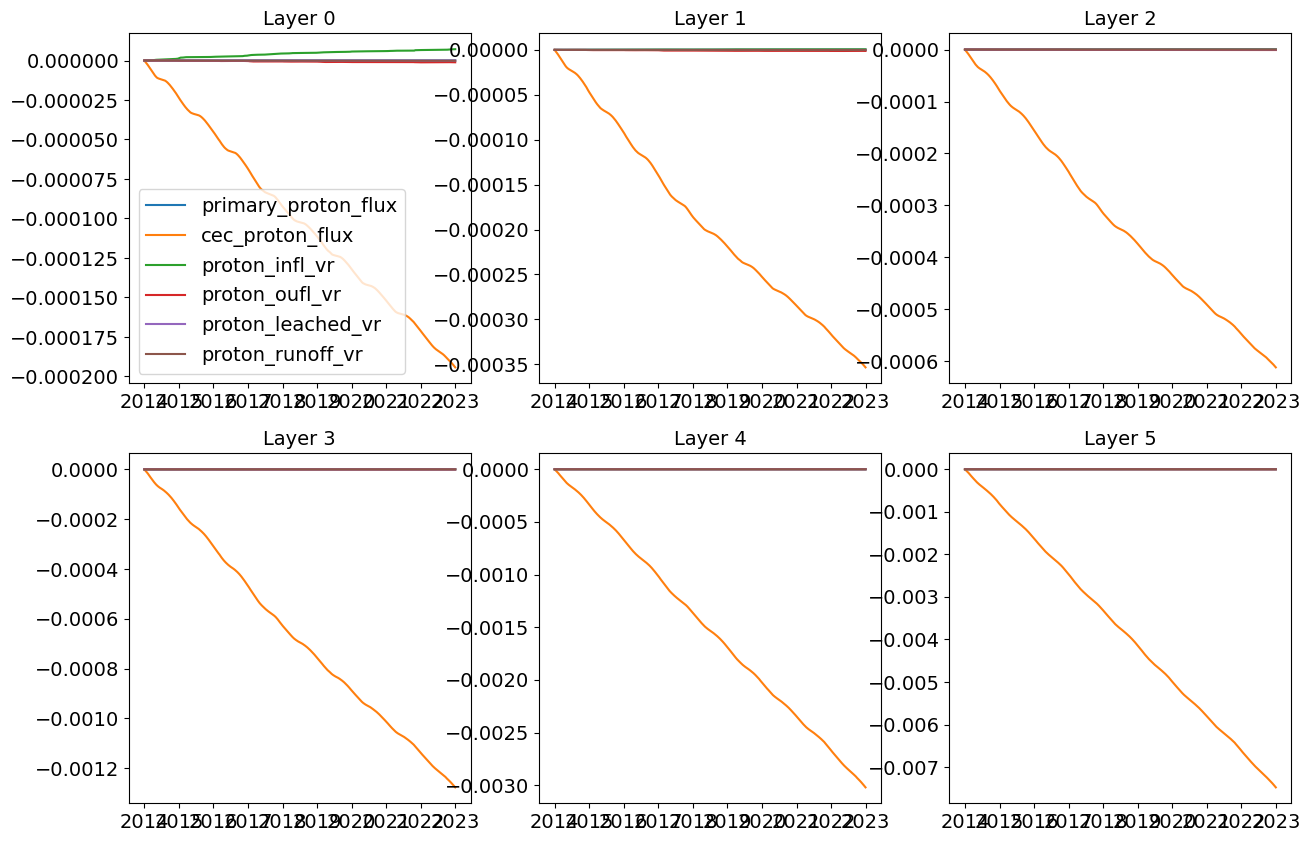

In [ ]:
# individual terms in the H+ balance
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for layer in range(6):
    ax = axes.flat[layer]
    s = pd.Series(- hr['primary_proton_flux_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'primary_proton_flux')

    s = pd.Series(hr['cec_proton_flux_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'cec_proton_flux')

    s = pd.Series(hr['proton_infl_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_infl_vr')

    s = pd.Series(- hr['proton_oufl_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_oufl_vr')

    #s = pd.Series(- hr['proton_uptake_vr'][:,layer,0].values, 
    #              index = tvec).cumsum()
    #ax.plot(tvec, s, label = 'proton_uptake_vr')

    s = pd.Series(- hr['proton_leached_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_leached_vr')

    s = pd.Series(- hr['proton_runoff_vr'][:,layer,0].values, 
                  index = tvec).cumsum()
    ax.plot(tvec, s, label = 'proton_runoff_vr')

    if layer == 0:
        ax.legend()
    ax.set_title(f'Layer {layer}')
    if np.mod(i, 3) == 0:
        ax.set_ylabel('g m-3 soil')

fig.savefig('total_proton_flux_vr_rolling.png', dpi = 600)

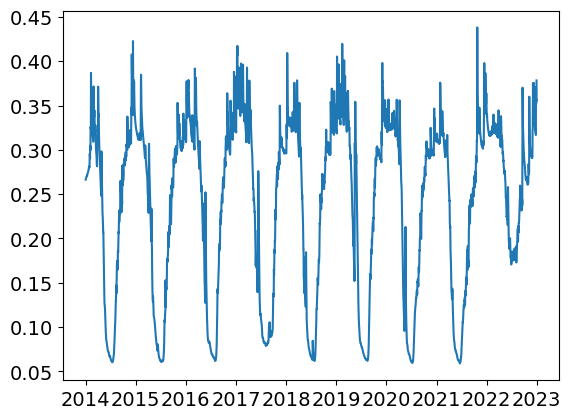

In [ ]:
# soil water content
plt.plot(tvec, hr['H2OSOI'][:, 0, 0].values)

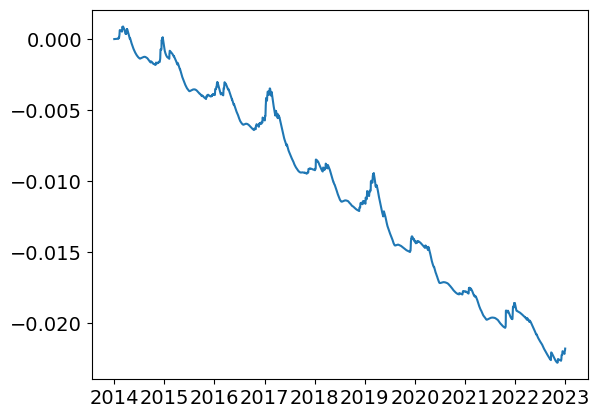

In [ ]:
# individual terms in the infiltration balance
s = pd.Series(hr['QIN'][:, 0, 0].values - hr['QOUT'][:, 9, 0].values - \
              hr['QOVER'][:, 0].values - hr['QDRAI'][:, 0].values - \
              hr['QLFX_ROOTSOI'][:, :, 0].sum(axis = 1).values, 
              index = tvec).cumsum()
plt.plot(tvec, s)

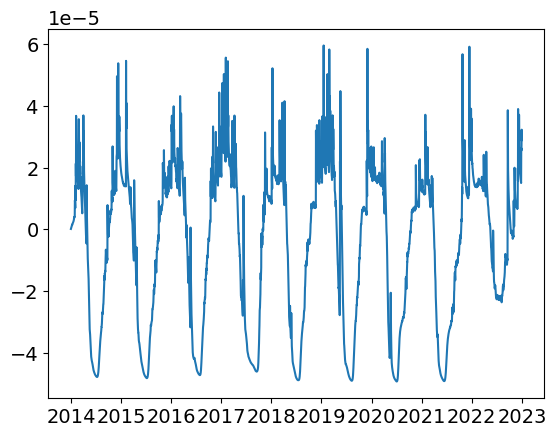

In [ ]:
# individual terms in the infiltration balance
s = pd.Series(hr['QIN'][:, 1, 0].values - hr['QOUT'][:, 1, 0].values - \
              hr['QLFX_ROOTSOI'][:, 1, 0], 
              index = tvec).cumsum()
plt.plot(tvec, s)

# 9. Total C sequestration

Text(0, 0.5, 'Cumulative sequestration (gC m-2)')

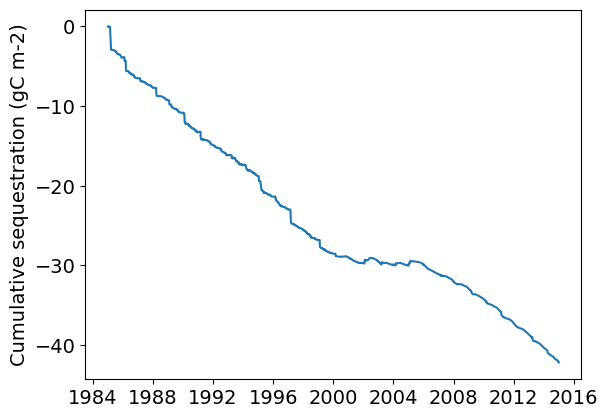

In [ ]:
# gC m-2 s-1 => gC m-2 day-1, cumulative sum of daily values
plt.plot(tvec, hr['r_sequestration'].cumsum() * 86400)
plt.ylabel('Cumulative sequestration (gC m-2)')

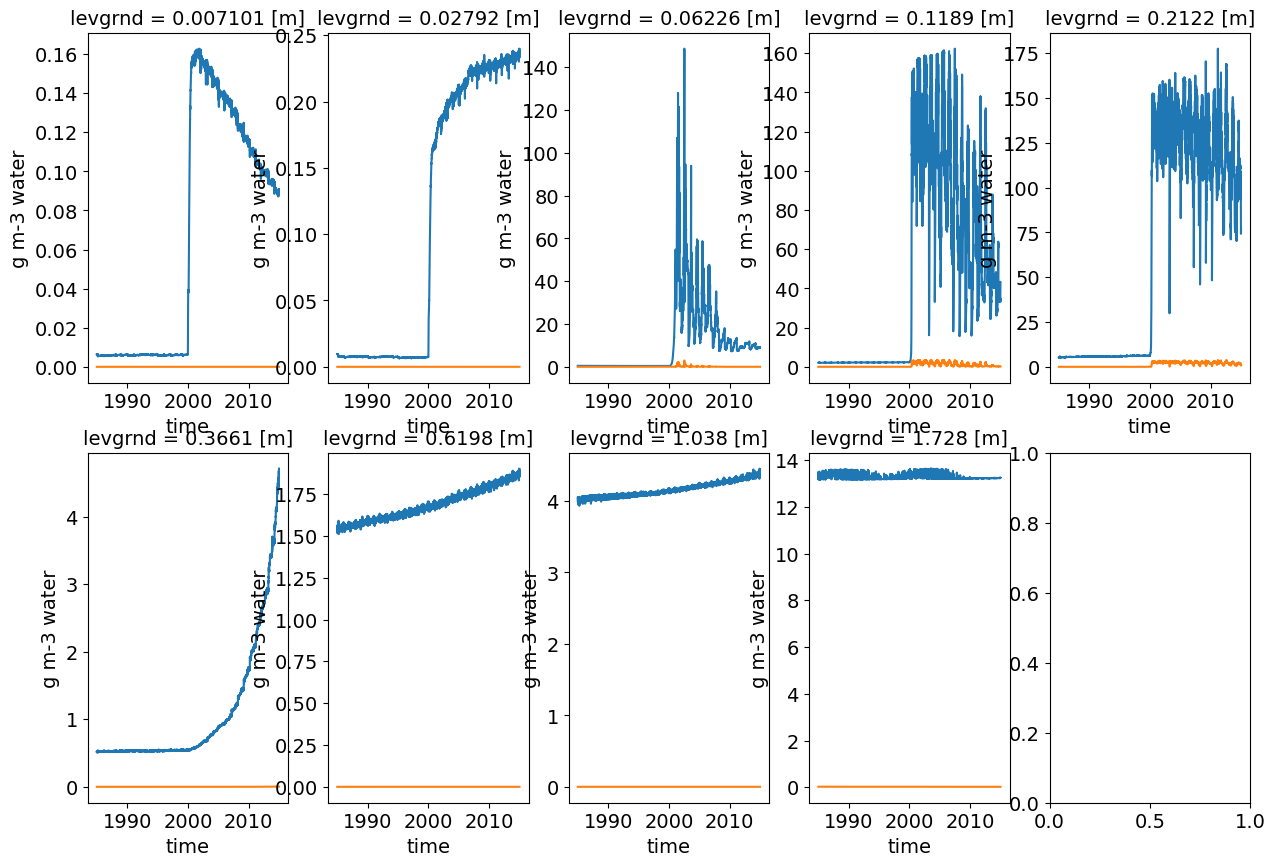

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (20, 10))
for layer in range(1, 10):
    ax = axes.flat[layer-1]
    (hr['bicarbonate_vr'][:, layer-1, 0] / hr['H2OSOI'][:, layer-1, 0]).plot(ax = ax)
    (hr['carbonate_vr'][:, layer-1, 0] / hr['H2OSOI'][:, layer-1, 0]).plot(ax = ax)
    ax.set_ylabel('g m-3 water')

Text(0, 0.5, 'Cumulative drainage g m-2 day-1')

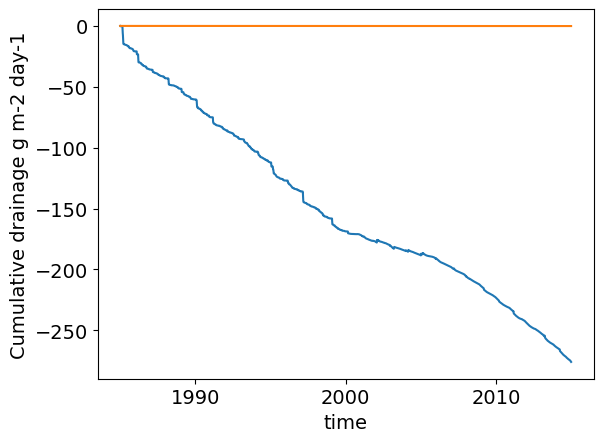

In [ ]:
(hr['bicarbonate_drainage'][:, 0] * 86400).cumsum().plot()
(hr['carbonate_drainage'][:, 0] * 86400).cumsum().plot()
plt.ylabel('Cumulative drainage g m-2 day-1')

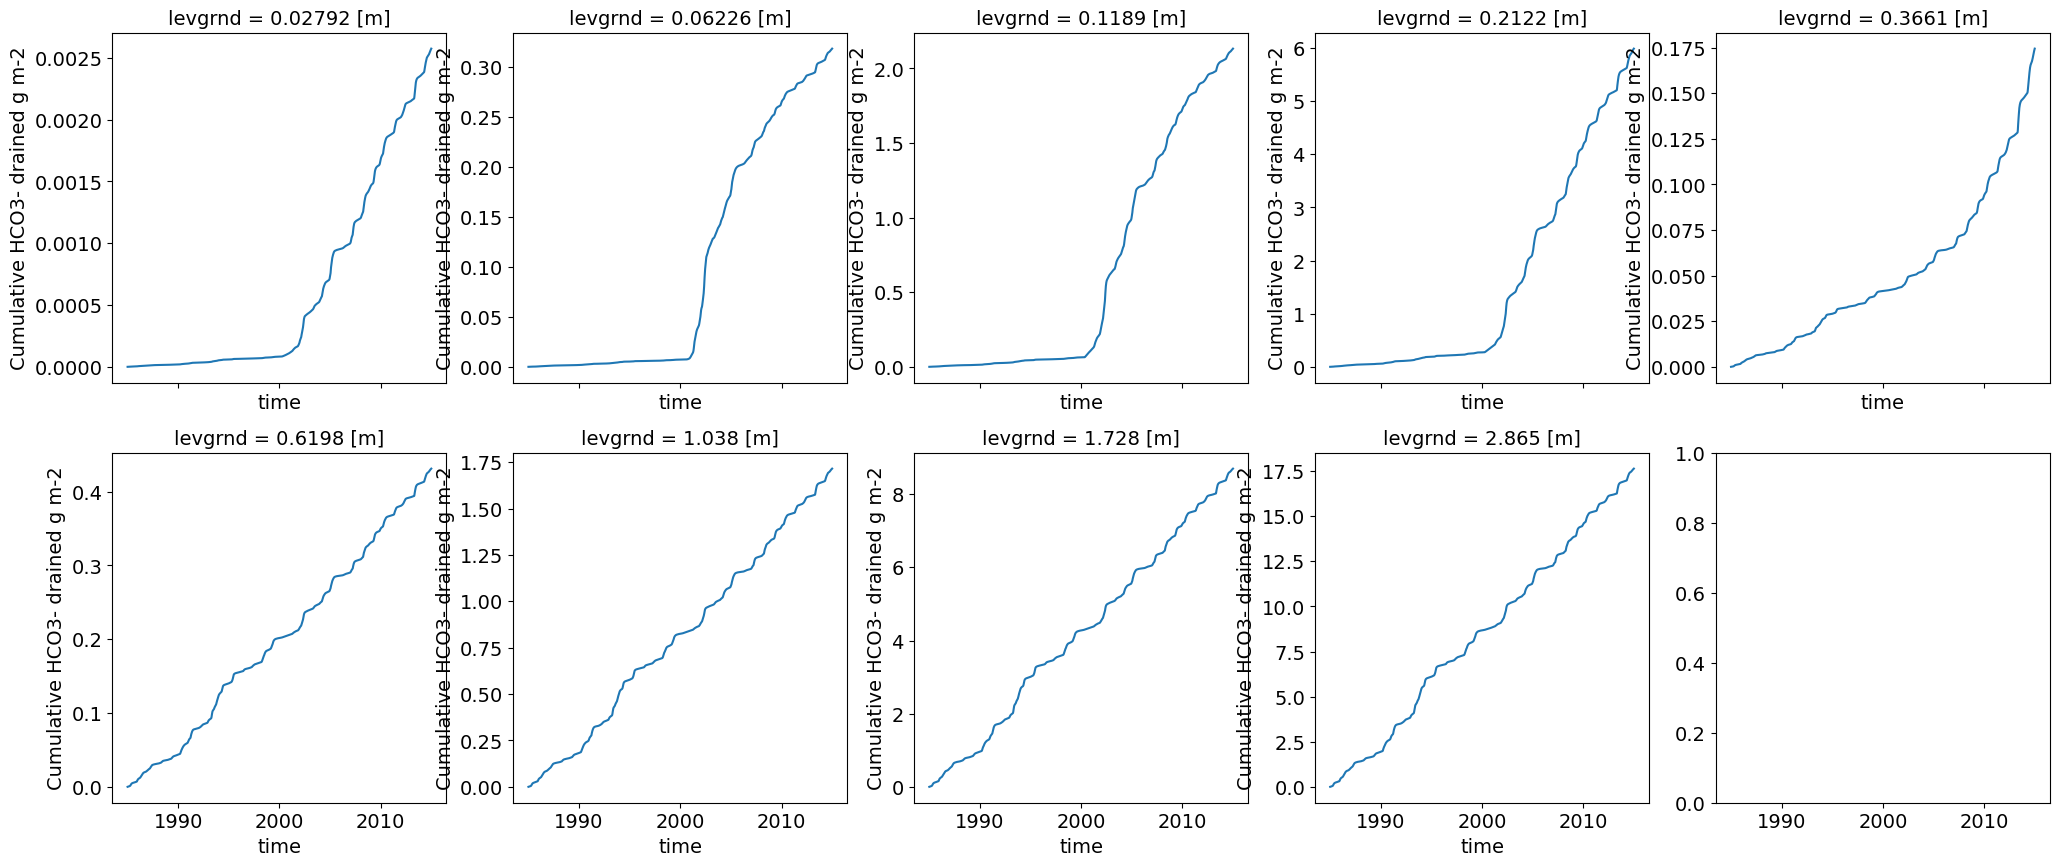

In [ ]:
LEVGRND = np.array([0.007100635, 0.027925, 0.06225858, 0.1188651, 0.2121934,
                    0.3660658, 0.6197585, 1.038027, 1.727635, 2.864607, 4.739157,
                    7.829766, 12.92532, 21.32647, 35.17762])
LEVGRND_I = np.append(np.insert(
    (LEVGRND[1:] + LEVGRND[:-1])*0.5, 0, 0
), LEVGRND[-1] + 0.5 * (LEVGRND[-1] - LEVGRND[-2]))
THICKNESS = np.diff(LEVGRND_I)

fig, axes = plt.subplots(2, 5, figsize = (25, 10), sharex = True)
for layer in range(1, 10):
    ax = axes.flat[layer-1]
    (hr['bicarbonate_leached_vr'][:, layer, 0] * THICKNESS[layer-1] * 86400).cumsum().plot(ax = ax)
    ax.set_ylabel('Cumulative HCO3- drained g m-2')

In [ ]:
#hr.close()